<a href="https://colab.research.google.com/github/wrichard84/data201/blob/main/PythonProject1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [119]:
import pandas as pd
import matplotlib.pyplot as plot
import numpy as np
import seaborn as sns
%matplotlib inline

In [120]:
missing_values = ["s", "S", "na"]
df = pd.read_csv('https://raw.githubusercontent.com/CunyLaguardiaDataAnalytics/datasets/master/2014-15_To_2016-17_School-_Level_NYC_Regents_Report_For_All_Variables.csv', na_values = missing_values)

In [121]:
df.head()

,School DBN,School Name,School Level,Regents Exam,Year,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Common Core Algebra,2017,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2015,16,77.9,1.0,6.3,15.0,93.8,7.0,43.8,NaN,NaN
2,01M034,P.S. 034 Franklin D. Roosevelt,K-8,Living Environment,2016,9,74.0,1.0,11.1,8.0,88.9,2.0,22.2,NaN,NaN
3,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2016,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01M140,P.S. 140 Nathan Straus,K-8,Common Core Algebra,2017,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
df.columns

Index(['School DBN', 'School Name', 'School Level', 'Regents Exam', 'Year',
       'Total Tested', 'Mean Score', 'Number Scoring Below 65',
       'Percent Scoring Below 65', 'Number Scoring 65 or Above',
       'Percent Scoring 65 or Above', 'Number Scoring 80 or Above',
       'Percent Scoring 80 or Above', 'Number Scoring CR',
       'Percent Scoring CR'],
      dtype='object')

**Question: Which year had the highest number of students testing at Fort Hamilton High School in Brooklyn?**

In [123]:
drop_cols = ['School DBN', 'School Level', 'Percent Scoring Below 65', 'Percent Scoring 65 or Above', 'Percent Scoring 80 or Above', 'Number Scoring CR', 'Percent Scoring CR', 'Mean Score', 'Number Scoring Below 65', 'Number Scoring 65 or Above']
df.drop(drop_cols, inplace = True, axis = 1)

In [124]:
#Filtering out Fort Hamilton High School data
fort_hamilton = df['School Name'] == 'Fort Hamilton High School'

In [125]:
df_fort_hamilton = df[fort_hamilton]
df_fort_hamilton.shape

(475, 5)

In [166]:
#Descriptive statistics for Fort Hamilton High School data
df_fort_hamilton.describe()

,Year,Total Tested,Number Scoring 80 or Above
count,475.000000,475.000000,444.000000
mean,2015.922105,306.452632,111.400901
std,0.787719,293.077299,139.949238
min,2015.000000,1.000000,0.000000
25%,2015.000000,61.500000,13.750000
50%,2016.000000,250.000000,68.000000
75%,2017.000000,424.000000,154.500000
max,2017.000000,1416.000000,698.000000


In [126]:
df_fort_hamilton.head()

,School Name,Regents Exam,Year,Total Tested,Number Scoring 80 or Above
12201,Fort Hamilton High School,Algebra2/Trigonometry,2015,709,212.0
12202,Fort Hamilton High School,Algebra2/Trigonometry,2016,669,159.0
12203,Fort Hamilton High School,Common Core Algebra,2015,707,26.0
12204,Fort Hamilton High School,Common Core Algebra,2016,1248,232.0
12205,Fort Hamilton High School,Common Core Algebra,2017,1313,373.0


In [127]:
#sorting the Fort Hamilton data by year and total tested
df_fort_hamilton.sort_values(["Year", "Total Tested"], ascending=[True, False])

,School Name,Regents Exam,Year,Total Tested,Number Scoring 80 or Above
12218,Fort Hamilton High School,Global History and Geography,2015,1308,523.0
12214,Fort Hamilton High School,English,2015,1228,559.0
12223,Fort Hamilton High School,Living Environment,2015,1216,426.0
41376,Fort Hamilton High School,Global History and Geography,2015,1088,515.0
41369,Fort Hamilton High School,English,2015,1085,543.0
...,...,...,...,...,...
184700,Fort Hamilton High School,Physical Settings/Physics,2017,9,2.0
184702,Fort Hamilton High School,Physical Settings/Physics,2017,7,2.0
41356,Fort Hamilton High School,Common Core Algebra2,2017,3,NaN
41397,Fort Hamilton High School,Physical Settings/Chemistry,2017,2,NaN


In [128]:
Years_Tested = ['Year', 'Total Tested']
df_fort_hamilton[Years_Tested].sort_values(["Year", "Total Tested"], ascending=[True, False])

,Year,Total Tested
12218,2015,1308
12214,2015,1228
12223,2015,1216
41376,2015,1088
41369,2015,1085
...,...,...
184700,2017,9
184702,2017,7
41356,2017,3
41397,2017,2


In [129]:
df_fort_hamilton_years = df_fort_hamilton[Years_Tested].sort_values(["Year", "Total Tested"], ascending=[True, False])

In [130]:
df_fort_hamilton_years.head()

,Year,Total Tested
12218,2015,1308
12214,2015,1228
12223,2015,1216
41376,2015,1088
41369,2015,1085


In [131]:
df_fort_hamiton_2015 = df_fort_hamilton_years[df_fort_hamilton_years["Year"]== 2015]

In [132]:
df_fort_hamilton_2015_total = df_fort_hamiton_2015["Total Tested"].sum()
print(df_fort_hamilton_2015_total)

52235


In [133]:
df_fort_hamilton_2016 = df_fort_hamilton_years[df_fort_hamilton_years["Year"]== 2016]

In [134]:
df_fort_hamilton_2016_total = df_fort_hamilton_2016["Total Tested"].sum()
print(df_fort_hamilton_2016_total)

48605


In [135]:
df_fort_hamilton_2017 = df_fort_hamilton_years[df_fort_hamilton_years["Year"]== 2017]

In [136]:
df_fort_hamilton_2017_total = df_fort_hamilton_2017["Total Tested"].sum()
print(df_fort_hamilton_2017_total)

44725


In [137]:
#Creating new dataframe of Fort Hamilton High School yearly total tested
data = [['2015', 52235], ['2016', 48605], ['2017', 44725]]
df_fort_hamilton_Total_Tested = pd.DataFrame(data, columns=['Year', 'Total_Tested'])
print(df_fort_hamilton_Total_Tested)

   Year  Total_Tested
0  2015         52235
1  2016         48605
2  2017         44725


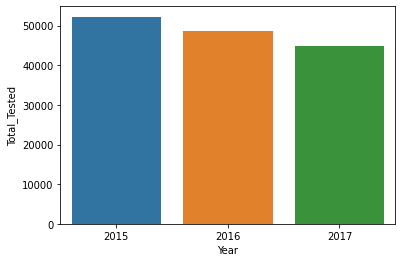

In [138]:
#Bar graph comparing the sum total tested among tests administered at Fort Hamilton High School
sns.barplot(x='Year', y='Total_Tested', data = df_fort_hamilton_Total_Tested)

**2015 saw the highest number of students testing at Fort Hamilton High School (52235)**

**Now let's compare total students tested with another South Brooklyn school.**

In [139]:
#Filtering out South Brooklyn Community High School data
south_bk_highschool = df['School Name'] == 'South Brooklyn Community High School'

In [140]:
df_south_bk_highschool = df[south_bk_highschool]
df_south_bk_highschool.shape

(258, 5)

In [165]:
#Descriptive statistics for South Brooklyn High School date:
df_south_bk_highschool.describe()

,Year,Total Tested,Number Scoring 80 or Above
count,258.000000,258.000000,114.000000
mean,2016.034884,10.348837,3.596491
std,0.810164,9.850360,4.631021
min,2015.000000,1.000000,0.000000
25%,2015.000000,2.000000,0.000000
50%,2016.000000,7.000000,2.000000
75%,2017.000000,16.000000,4.000000
max,2017.000000,44.000000,20.000000


In [141]:
df_south_bk_highschool.head()

,School Name,Regents Exam,Year,Total Tested,Number Scoring 80 or Above
9914,South Brooklyn Community High School,Common Core Algebra,2015,1,NaN
9915,South Brooklyn Community High School,Common Core Algebra,2016,9,0.0
9916,South Brooklyn Community High School,Common Core Algebra,2017,16,2.0
9917,South Brooklyn Community High School,Common Core Algebra2,2017,2,NaN
9918,South Brooklyn Community High School,Common Core English,2015,16,6.0


In [142]:
#sorting the South Brooklyn data by year and total tested
df_south_bk_highschool.sort_values(["Year", "Total Tested"], ascending=[True, False])

,School Name,Regents Exam,Year,Total Tested,Number Scoring 80 or Above
9926,South Brooklyn Community High School,Global History and Geography,2015,37,0.0
37367,South Brooklyn Community High School,Global History and Geography,2015,33,NaN
9929,South Brooklyn Community High School,Integrated Algebra,2015,30,1.0
9937,South Brooklyn Community High School,U.S. History and Government,2015,28,11.0
9931,South Brooklyn Community High School,Living Environment,2015,27,4.0
...,...,...,...,...,...
177058,South Brooklyn Community High School,Living Environment,2017,1,NaN
177062,South Brooklyn Community High School,Living Environment,2017,1,NaN
177067,South Brooklyn Community High School,Physical Settings/Earth Science,2017,1,NaN
177070,South Brooklyn Community High School,Physical Settings/Earth Science,2017,1,NaN


In [143]:
Years_Tested = ['Year', 'Total Tested']
df_south_bk_highschool[Years_Tested].sort_values(["Year", "Total Tested"], ascending=[True, False])

,Year,Total Tested
9926,2015,37
37367,2015,33
9929,2015,30
9937,2015,28
9931,2015,27
...,...,...
177058,2017,1
177062,2017,1
177067,2017,1
177070,2017,1


In [144]:
df_south_bk_highschool_years = df_south_bk_highschool[Years_Tested].sort_values(["Year", "Total Tested"], ascending=[True, False])

In [147]:
df_south_bk_highschool_years.tail()

,Year,Total Tested
177058,2017,1
177062,2017,1
177067,2017,1
177070,2017,1
177079,2017,1


In [148]:
df_south_bk_highschool_2015 = df_south_bk_highschool_years[df_south_bk_highschool_years["Year"]== 2015]

In [149]:
df_south_bk_highschool_2015_total = df_south_bk_highschool_2015["Total Tested"].sum()
print(df_south_bk_highschool_2015_total)

810


In [150]:
df_south_bk_highschool_2016 = df_south_bk_highschool_years[df_south_bk_highschool_years["Year"]== 2016]

In [151]:
df_south_bk_highschool_2016_total = df_south_bk_highschool_2016["Total Tested"].sum()
print(df_south_bk_highschool_2016_total)

920


In [152]:
df_south_bk_highschool_2017 = df_south_bk_highschool_years[df_south_bk_highschool_years["Year"]== 2017]

In [153]:
df_south_bk_highschool_2017_total = df_south_bk_highschool_2017["Total Tested"].sum()
print(df_south_bk_highschool_2017_total)

940


In [154]:
#Creating new dataframe of South Brooklyn High School yearly total tested
data = [['2015', 810], ['2016', 920], ['2017', 940]]
df_south_bk_highschool_Total_Tested = pd.DataFrame(data, columns=['Year', 'Total_Tested'])
print(df_south_bk_highschool_Total_Tested)

   Year  Total_Tested
0  2015           810
1  2016           920
2  2017           940


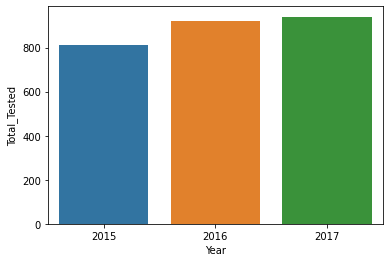

In [155]:
#Bar graph comparing the sum total tested among tests administered at South Brooklyn High School
sns.barplot(x='Year', y='Total_Tested', data = df_south_bk_highschool_Total_Tested)

**2017 saw the highest number of students testing at South Brooklyn Community High School (940)**

**Let's compare highest year totals between the two schools in a bar chart:**

In [163]:
#Creating new dataframe of highest number of students testing between Fort Hamilton High School and South Brooklyn High School
data = [['Fort Hamilton HS - 2015', 52235], ['South Brooklyn HS - 2017', 940]]
df_highest_total_tested_comp = pd.DataFrame(data, columns=['School', 'Total_Tested'])
print(df_highest_total_tested_comp)

                     School  Total_Tested
0   Fort Hamilton HS - 2015         52235
1  South Brooklyn HS - 2017           940


[Text(0.5, 1.0, 'Highest Total Students Tested')]

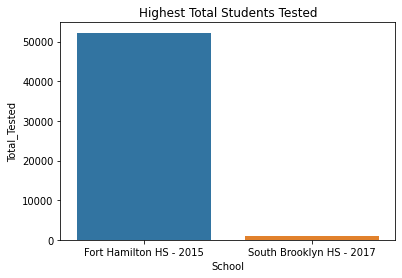

In [164]:
#Bar graph comparing the highest total tested between the two schools (school label incdlues the year featured)
sns.barplot(x='School', y='Total_Tested', data = df_highest_total_tested_comp).set(title='Highest Total Students Tested')

**In conclusion, when looking at data between the years of 2015-2017, Fort Hamilton High School had the highest number of students taking the Regents Exams in 2015. I assumed (bias) that this would be the case for other schools, that perhaps it was a year with a large graduating population and a lot of students needed to take the exam. When looking at the same data for South Brooklyn Community High School, I found they had significantly less students take the exam, and that the year with the highest total students testing was in fact 2017, not 2015.**